# 时间序列

## datetime模块
* date : 使用公历日历存储日期(年月日)
* time : 将时间存储为小时，分钟，秒和微秒
* datetime : 存储日期和时间
* timedelta : 表示两个datetime值之间的差
* tzinfo : 用于存储时区信息
```python
Init signature: datetime(self, /, *args, **kwargs)
Docstring:     
datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
```

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,time,date,timedelta,tzinfo
now = datetime.now()
now

datetime.datetime(2019, 5, 21, 14, 35, 51, 297095)

In [4]:
now.year,now.month,now.day

(2019, 5, 21)

In [5]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
#两个时间对象相减
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start + 2*timedelta(12)

datetime.datetime(2011, 1, 31, 0, 0)

In [8]:
#字符串与datetime的转换
#使用str方法或者传递指定格式给strftime
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

```python
'''
datetime日期格式
%Y:四位数年份，%y:两位数年份，%m:两位数月份，%d:两位数日期
%H：小时，24小时制，%I：小时，12小时制，%S：两位数分钟
%S:秒，%w:星期[0(星期天),6]
%U:一年中的星期数[00,53].以星期天为每周的第一天
%W:一年中的星期数[00,53].以星期一为每周的第一天
%F:'%Y-%m-%d'简写
%D:'%m/%d/%y'简写
'''
```

In [10]:
#使用strptime和这些格式代码将字符串转换为日期
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
#在日期格式未知的情况下使用通用日期格式包:dateutil.parser.parse
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2019, 1, 31, 22, 45)

In [14]:
#设定日期在月份前面
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
#pandas 的to_datetime方法
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
#可以处理那些被认为是缺失值的值
idx = pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]  #NaT:not a time

NaT

In [18]:
dates = [datetime(2011,1,2),datetime(2011,1,5),
         datetime(2011,1,7),datetime(2011,1,8),
         datetime(2011,1,10),datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02    1.590882
2011-01-05    0.293739
2011-01-07   -0.376594
2011-01-08    0.200787
2011-01-10   -1.094345
2011-01-12    0.072083
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts+ts[::2]

2011-01-02    3.181764
2011-01-05         NaN
2011-01-07   -0.753188
2011-01-08         NaN
2011-01-10   -2.188690
2011-01-12         NaN
dtype: float64

In [21]:
#索引
stamp = ts.index[2]
ts[stamp]

-0.376594108099935

In [22]:
#可以传递一个能解释为日期的字符串
ts['1/10/2011']

-1.0943452106948375

In [23]:
ts['20110110']

-1.0943452106948375

In [24]:
#对于长序列，可以传递月份或年份进行切片
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    0.490298
2000-01-02   -1.451051
2000-01-03   -0.097972
2000-01-04    1.002408
2000-01-05    0.294136
2000-01-06   -1.015983
2000-01-07    0.546301
2000-01-08   -1.071046
2000-01-09    0.985784
2000-01-10    1.135240
2000-01-11    0.166953
2000-01-12    0.973242
2000-01-13    0.590771
2000-01-14    0.913143
2000-01-15    0.320999
2000-01-16    1.028359
2000-01-17    0.777883
2000-01-18   -0.338818
2000-01-19   -0.240021
2000-01-20    0.355954
2000-01-21   -0.867734
2000-01-22   -0.172236
2000-01-23    0.397123
2000-01-24    0.187197
2000-01-25   -1.310630
2000-01-26    0.805898
2000-01-27    1.189346
2000-01-28   -0.628942
2000-01-29    0.203885
2000-01-30    0.419981
                ...   
2002-08-28    0.938789
2002-08-29   -0.034991
2002-08-30    0.727823
2002-08-31   -0.055238
2002-09-01    1.380203
2002-09-02   -0.062987
2002-09-03    0.394097
2002-09-04   -0.440822
2002-09-05    0.411463
2002-09-06   -0.322269
2002-09-07    0.572930
2002-09-08   -0.921021
2002-09-09 

In [25]:
#选取出2001年的数据
longer_ts['2001']

2001-01-01    0.220091
2001-01-02    1.004451
2001-01-03   -0.231612
2001-01-04    1.755837
2001-01-05   -2.258935
2001-01-06   -1.599820
2001-01-07    0.210828
2001-01-08   -0.972516
2001-01-09    1.304141
2001-01-10    0.038088
2001-01-11    0.009357
2001-01-12    0.013117
2001-01-13    1.653693
2001-01-14   -1.848564
2001-01-15    1.615503
2001-01-16   -0.349181
2001-01-17   -1.614842
2001-01-18   -1.934180
2001-01-19    0.036273
2001-01-20    0.823846
2001-01-21   -1.234619
2001-01-22   -1.784253
2001-01-23   -1.153051
2001-01-24   -1.404875
2001-01-25   -0.583528
2001-01-26    0.246198
2001-01-27   -1.503886
2001-01-28   -1.226544
2001-01-29   -1.775197
2001-01-30   -1.447913
                ...   
2001-12-02    1.616695
2001-12-03    0.569294
2001-12-04    0.288881
2001-12-05   -0.188730
2001-12-06   -1.046840
2001-12-07   -1.453369
2001-12-08   -0.818708
2001-12-09   -1.538459
2001-12-10   -0.945815
2001-12-11    1.426239
2001-12-12   -2.327203
2001-12-13   -1.113473
2001-12-14 

In [26]:
#选取出2001年5月的数据
longer_ts['2001-05']

2001-05-01    0.703128
2001-05-02   -0.539083
2001-05-03   -0.109045
2001-05-04   -2.317606
2001-05-05   -0.532049
2001-05-06   -0.479223
2001-05-07    2.070662
2001-05-08   -1.167957
2001-05-09    0.358517
2001-05-10    2.111740
2001-05-11   -0.075948
2001-05-12    0.940103
2001-05-13    0.251248
2001-05-14    0.256404
2001-05-15    1.162487
2001-05-16   -0.096129
2001-05-17    0.186772
2001-05-18    0.307131
2001-05-19    0.044471
2001-05-20   -0.195603
2001-05-21    0.063804
2001-05-22   -1.029553
2001-05-23   -0.831507
2001-05-24    0.931212
2001-05-25    0.359474
2001-05-26   -1.326787
2001-05-27   -1.844889
2001-05-28    2.126957
2001-05-29   -0.895577
2001-05-30    0.567420
2001-05-31   -2.378856
Freq: D, dtype: float64

In [27]:
#使用datetime对象进行切片
longer_ts[datetime(2001,5,1):datetime(2001,5,21)]

2001-05-01    0.703128
2001-05-02   -0.539083
2001-05-03   -0.109045
2001-05-04   -2.317606
2001-05-05   -0.532049
2001-05-06   -0.479223
2001-05-07    2.070662
2001-05-08   -1.167957
2001-05-09    0.358517
2001-05-10    2.111740
2001-05-11   -0.075948
2001-05-12    0.940103
2001-05-13    0.251248
2001-05-14    0.256404
2001-05-15    1.162487
2001-05-16   -0.096129
2001-05-17    0.186772
2001-05-18    0.307131
2001-05-19    0.044471
2001-05-20   -0.195603
2001-05-21    0.063804
Freq: D, dtype: float64

In [28]:
print(ts)
ts.truncate(after='1/9/2011')

2011-01-02    1.590882
2011-01-05    0.293739
2011-01-07   -0.376594
2011-01-08    0.200787
2011-01-10   -1.094345
2011-01-12    0.072083
dtype: float64


2011-01-02    1.590882
2011-01-05    0.293739
2011-01-07   -0.376594
2011-01-08    0.200787
dtype: float64

In [29]:
ts.truncate(before='1/9/2011')

2011-01-10   -1.094345
2011-01-12    0.072083
dtype: float64

In [30]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),index=dates,
                       columns=['Colorado','Texas','New York','Ohio'])
#选取2001年5月的数据
long_df.loc['2001-5']

,Colorado,Texas,New York,Ohio
2001-05-02,1.330483,0.067233,0.211900,-0.620026
2001-05-09,-1.024658,1.016194,0.203375,-0.357533
2001-05-16,0.051472,1.809053,0.381848,-0.648996
2001-05-23,-0.563289,-0.165642,-0.477389,-1.484868
2001-05-30,-0.285290,0.043215,1.722967,-0.033804


In [31]:
#含有重复索引的时间序列
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [32]:
#查看索引是否唯一
dup_ts.index.is_unique

False

In [33]:
#聚合非唯一时间戳数据，使用groupby传递level=0
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [34]:
ts

2011-01-02    1.590882
2011-01-05    0.293739
2011-01-07   -0.376594
2011-01-08    0.200787
2011-01-10   -1.094345
2011-01-12    0.072083
dtype: float64

In [38]:
#使用resample方法将时间序列转换成固定的每日频率数据
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 生成日期范围
```python
Signature:
pd.date_range(
    ['start=None', 'end=None', 'periods=None', 'freq=None', 'tz=None', 'normalize=False', 'name=None', 'closed=None', '**kwargs'],
)
```

In [40]:
#date_range()：生成日期范围
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

#### periods : 控制时间跨度

In [42]:
#只传递一个起始或结束日期时，课用periods控制跨度
pd.date_range(start='2019-05-21',periods=10)

DatetimeIndex(['2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range(end='2019-05-21',periods=20)

DatetimeIndex(['2019-05-02', '2019-05-03', '2019-05-04', '2019-05-05',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21'],
              dtype='datetime64[ns]', freq='D')

#### freq : 控制时间频率
* D：天    
* B：工作日的每天
* H：小时
* T或min：分钟
* S：秒
* M：日历日的月底日期
* BM：工作日的月底日期
* MS：日历日的月初日期
* BMS：工作日的月初日期

In [48]:
pd.date_range('2019-05-21','2019-05-22',freq='H')

DatetimeIndex(['2019-05-21 00:00:00', '2019-05-21 01:00:00',
               '2019-05-21 02:00:00', '2019-05-21 03:00:00',
               '2019-05-21 04:00:00', '2019-05-21 05:00:00',
               '2019-05-21 06:00:00', '2019-05-21 07:00:00',
               '2019-05-21 08:00:00', '2019-05-21 09:00:00',
               '2019-05-21 10:00:00', '2019-05-21 11:00:00',
               '2019-05-21 12:00:00', '2019-05-21 13:00:00',
               '2019-05-21 14:00:00', '2019-05-21 15:00:00',
               '2019-05-21 16:00:00', '2019-05-21 17:00:00',
               '2019-05-21 18:00:00', '2019-05-21 19:00:00',
               '2019-05-21 20:00:00', '2019-05-21 21:00:00',
               '2019-05-21 22:00:00', '2019-05-21 23:00:00',
               '2019-05-22 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
pd.date_range('2019-01-01','2019-12-01',freq='BM')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29'],
              dtype='datetime64[ns]', freq='BM')

#### 频率和日期偏置

In [54]:
from pandas.tseries.offsets import Hour,Minute
#频率设为4小时的情况
pd.date_range(start='2019-05-21',periods=5,freq='4H')

DatetimeIndex(['2019-05-21 00:00:00', '2019-05-21 04:00:00',
               '2019-05-21 08:00:00', '2019-05-21 12:00:00',
               '2019-05-21 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [59]:
#多个偏置可以用加法组合
pd.date_range(start='2019-05-21 06:00:00',periods=8,freq='1h30min')

DatetimeIndex(['2019-05-21 06:00:00', '2019-05-21 07:30:00',
               '2019-05-21 09:00:00', '2019-05-21 10:30:00',
               '2019-05-21 12:00:00', '2019-05-21 13:30:00',
               '2019-05-21 15:00:00', '2019-05-21 16:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 重采样与频率转换
```python
Signature:
ts.resample(
    ['rule', 'how=None', 'axis=0', 'fill_method=None', 'closed=None', 'label=None', "convention='start'", 'kind=None', 'loffset=None', 'limit=None', 'base=0', 'on=None', 'level=None'],
)
```


In [69]:
#将更高频率的数据聚合到低频率称向下采样
#将低频率数据转换到高频率称向上采样
#例如，将天数据向上采样为周数据
rng = pd.date_range('2019-05-01','2019-06-30',freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts.resample('W').count()

2019-05-05    5
2019-05-12    7
2019-05-19    7
2019-05-26    7
2019-06-02    7
2019-06-09    7
2019-06-16    7
2019-06-23    7
2019-06-30    7
Freq: W-SUN, dtype: int64

#### 移动窗口函数

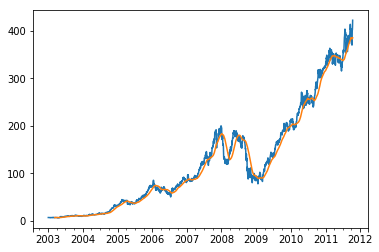

In [99]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
#rolling算子,根据50天数据的滑动窗口分组的平均值来平滑数据
close_px.AAPL.rolling(50).mean().plot()

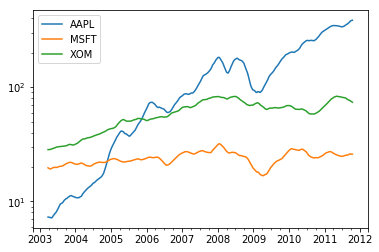

In [100]:
#使用expanding算子计算扩展窗口
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)